In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
%matplotlib inline
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
from glob import glob

from utils import *

Using TensorFlow backend.


# Parameter 

In [3]:
FD_DATA = 'data/img_pokemon_black'
FD_OUTPUT = 'data/output'
IMG_SIZE = (64, 64)
CODE_SIZE = 100
WINDOW_LEVEL = (-1, 1)
DIR_WEIGHT = 'weight'
DIR_LOG = 'log'
EPOCH = 10000
BATCH = 64
N_GPU = 1

# Prepare data 

In [4]:
names = glob(os.path.join(FD_DATA, '*.jpg'))
imgs = []
for name in names:
    imgs.append(img_to_array(load_img(name, target_size=IMG_SIZE)))
    
x_train = np.stack(imgs, axis=0)

In [5]:
x_train.shape

(750, 64, 64, 3)

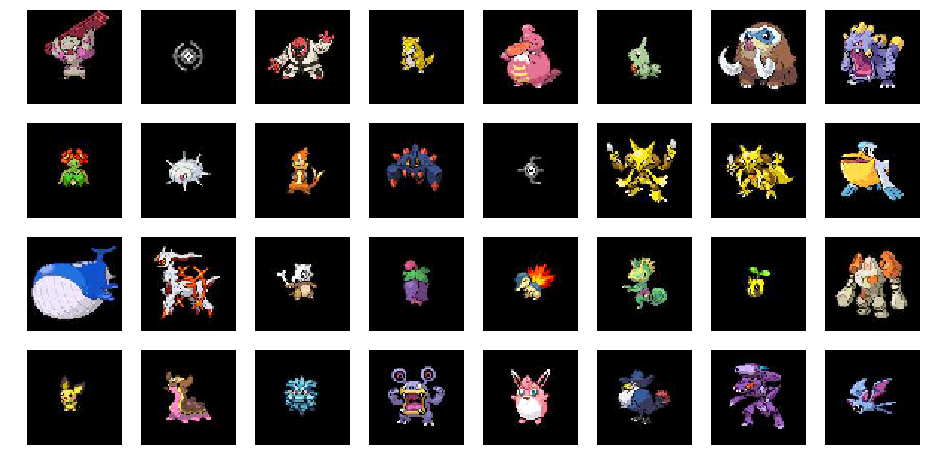

In [6]:
idx_plot = np.random.choice(x_train.shape[0], size=(32, ), replace=False)
plots(x_train[idx_plot, ...], rows=4, scale=(0, 255), figsize=(16,8))

## Normalization 

In [7]:
n_train = x_train.shape[0]

means_train = np.ones(shape=(n_train, 1,1,1)) * 128.0
stds_train = np.ones(shape=(n_train, 1,1,1)) * 128.0

x_train = (x_train - means_train) / stds_train

## Prepare generator 

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

x_train_gen = datagen.flow(x_train, batch_size=BATCH)

# Training

## Generate model

In [ ]:
from model.WGAN_2d import WGAN_2d

model = WGAN_2d(IMG_SIZE, CODE_SIZE,
                 #param_g={'use_deconv':True},
                 #param_d={'use_bn':False},
                 )

## Compile model 

In [10]:
model.compile()

## Fit model 

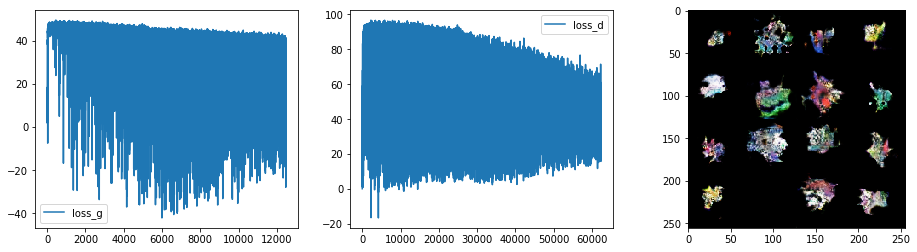

Epoch:  2495
Batches per epoch:  5


In [ ]:
losses_g, losses_d = model.fit_generator(x=x_train_gen,
                                        batch_size=BATCH,
                                        epochs=EPOCH,
                                        steps_per_epoch=5,
                                        ncritic=5,
                                        freq_save=1000)

In [ ]:
model.saver.last_checkpoints

In [ ]:
model.load_model('WGAN-10000')

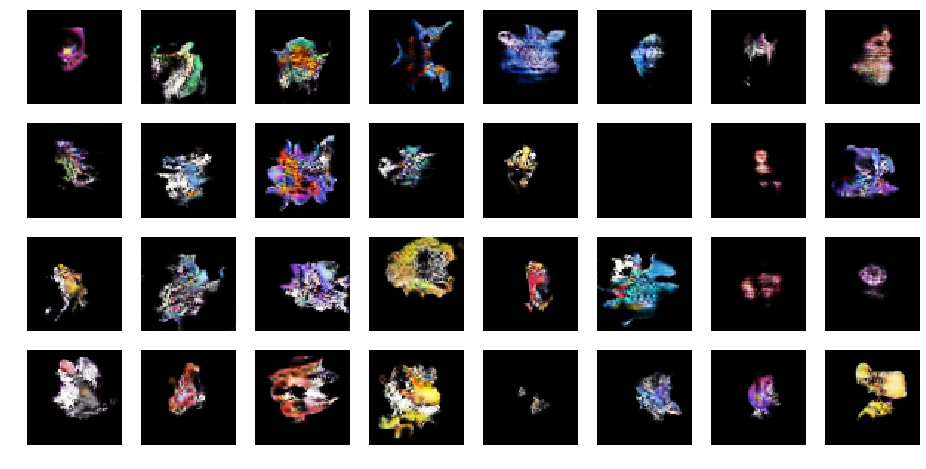

In [20]:
z = np.random.uniform(0, 1.0, size=(64, CODE_SIZE)).astype(np.float32)
img_plot = model.predict(z)

idx_plot = np.random.choice(img_plot.shape[0], size=(32, ), replace=False)
plots(img_plot[idx_plot, ...], rows=4, scale=(-1, 1), figsize=(16,8))